# 選擇online_shoppers_intention資料集作為分析依據，將先用k-mean 以及Hierarchical Clustering 做分群

### 資料前處理，剔除'Month'特徵，將'weekend','Revenue','VisitorType',轉化為0,1等numerical attributes

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import cluster,metrics

file_name = 'online_shoppers_intention.csv'
data = pd.read_csv(file_name)

data=data.drop(['Month'],axis=1)
data['Weekend'] = data['Weekend'].map({False:"0",True:"1"})
data['Revenue'] = data['Revenue'].map({False:"0",True:"1"})
data['Returing_Visitor'] = data['VisitorType'] == 'Returning_Visitor'
data['Returing_Visitor'] = data['Returing_Visitor'].map({False:"0",True:"1"})
data['New_Visitor'] = data['VisitorType'] == 'New_Visitor'
data['New_Visitor'] = data['New_Visitor'].map({False:"0",True:"1"})
data['Other'] = data['VisitorType'] == 'Other'
data['Other'] = data['Other'].map({False:"0",True:"1"})
data=data.drop(['VisitorType'],axis=1)
#data['Other'].value_counts()
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Returing_Visitor,New_Visitor,Other
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0,1,0,0


### K-means 分群演算法，利用迴圈測試不同分群參數K，從2~11，並將績效分數以圖表列印出來

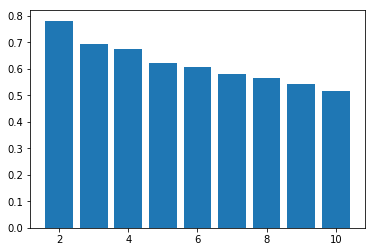

[0.7814622663450185, 0.6949952366300397, 0.6754999394885515, 0.6221967475522301, 0.6056099559938753, 0.5817562694894719, 0.5655274755643622, 0.543991609147289, 0.5144143090957201]


In [2]:
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(data)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(data, cluster_labels)
    silhouette_avgs.append(silhouette_avg)


plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)


###  K=2時分群績效最佳(0.7815)，則選擇K=2，作圖查看主要是哪些特徵影響分群較大

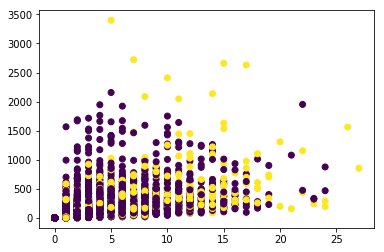

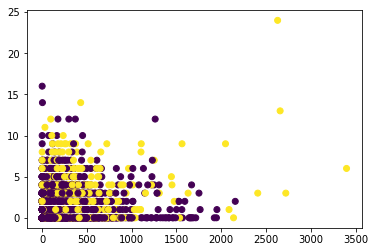

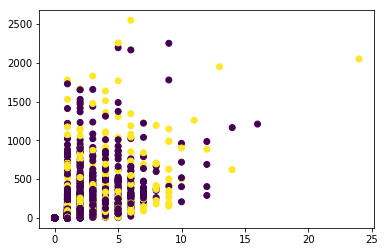

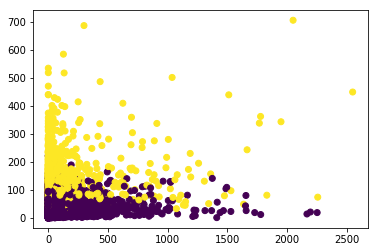

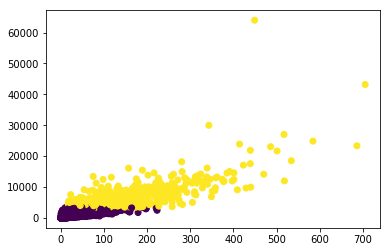

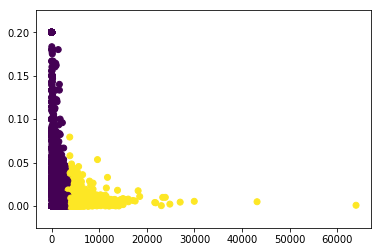

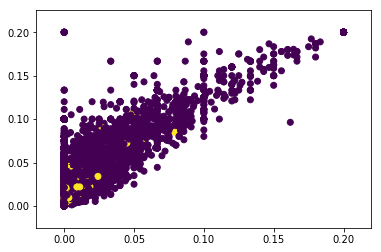

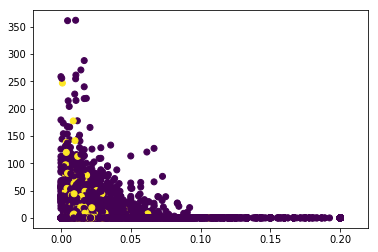

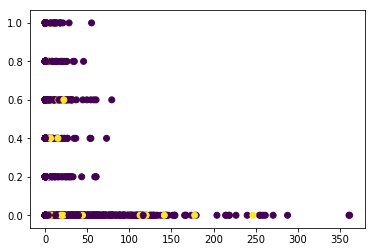

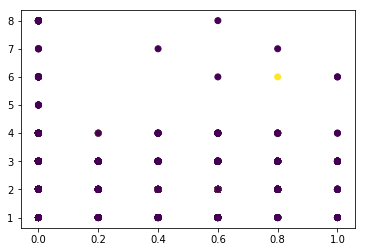

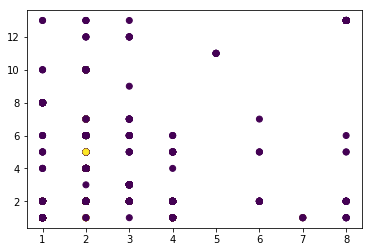

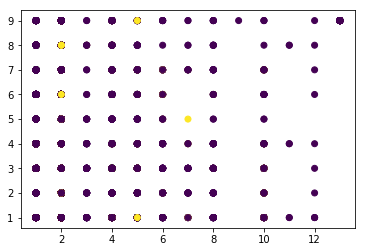

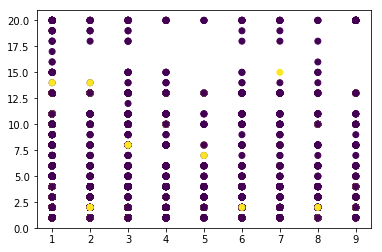

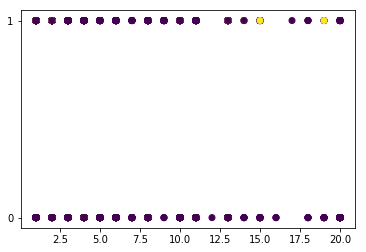

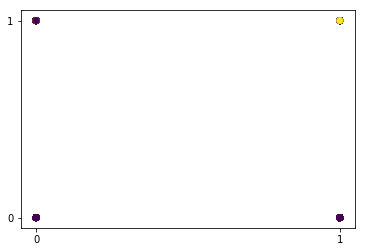

In [3]:
km = cluster.KMeans(n_clusters=2)  
y_pred = km.fit_predict(data)
for x in range(0,15):
    plt.scatter(data.values[:, x], data.values[:, x+1], c=y_pred) #C是第三維度 已顏色做維度
    plt.show()

### 從上列幾張圖，可看出特徵(3.4) ,(4.5), (5.6)影響較大，依照其關係作圖可以查看到明顯的分兩群的狀況。 

### 接下來則使用 Hierarchical Clustering ，可看出K=2時績效分數最佳(0.835)，且大於K-means，另外作圖可看出，特徵(3.4) ,(4.5), (5.6)影響分群結果較多

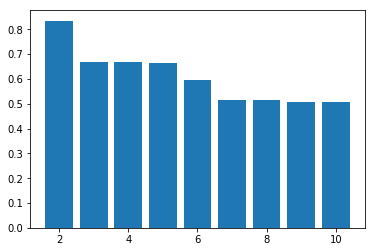

[0.8346634101795012, 0.6663159470222004, 0.667039460700064, 0.6643742665221511, 0.5968735806901287, 0.5149550900760327, 0.5153210729417981, 0.5066695583867064, 0.5071919849889016]


In [4]:

silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    h_fit = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = k)
    h_fit.fit(data)
    cluster_labels = h_fit.labels_
    silhouette_avg = metrics.silhouette_score(data, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)


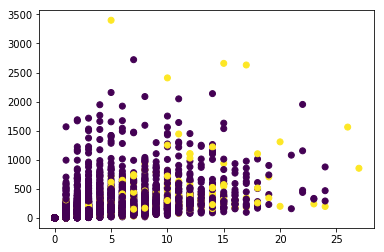

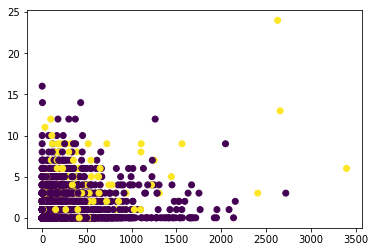

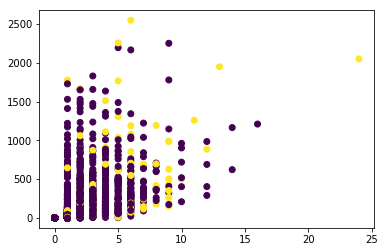

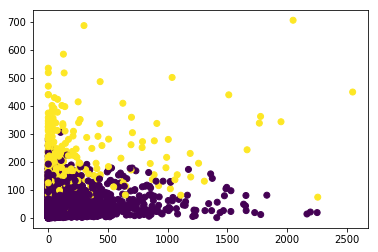

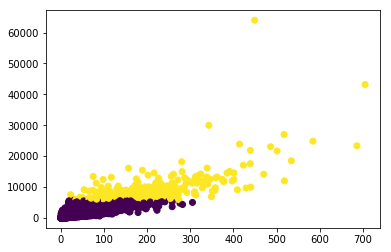

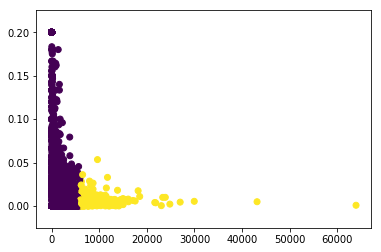

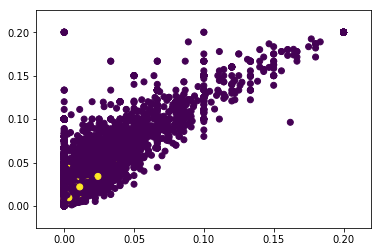

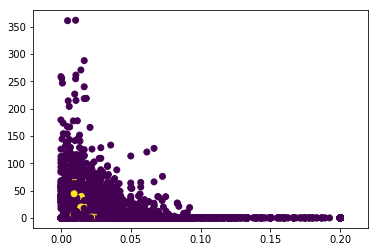

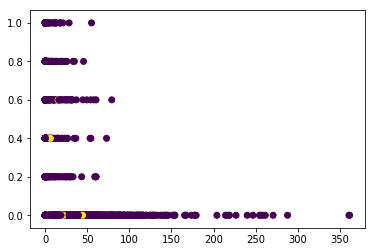

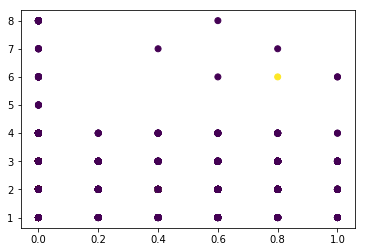

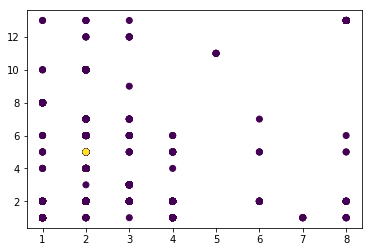

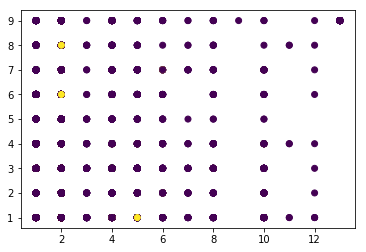

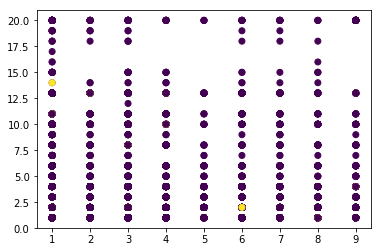

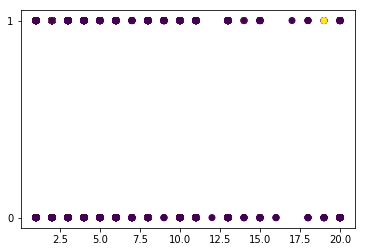

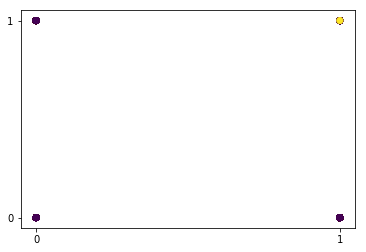

In [5]:
h = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 2) 
y_pred2 =h.fit_predict(data)
for s in range(0,15):
    plt.scatter(data.values[:, s], data.values[:, s+1], c=y_pred2) #C是第三維度 已顏色做維度
    plt.show()

### 使用SVM分類器，預測Revenue為label，是為0或1，可看出全部特徵都採納，準確度高達99.645%，但效率較慢，因此根據分群結果，選特徵3~6來訓練，準確度略降但是效率提高，為可接受結果。相較於下方選擇較多特徵7~15來訓練，比較耗時且準確度也較低，可見從分群大致歸類出的結論可對資料集分析有所幫助。  

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm,preprocessing

y=data['Revenue']
data=data.drop(['Revenue'],axis=1) 
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

classifier = svm.SVC(C=1, kernel='rbf',gamma='auto') 
classifier.fit(X_train,y_train)

acct_rate = accuracy_score(y_train, classifier.predict(X_train))
train_accuracy=acct_rate*100
print("Train Accuracy = %.3f%% " %  train_accuracy)

acct_rate2 = accuracy_score(y_test, classifier.predict(X_test))
test_accuracy=acct_rate*100
print("Test Accuracy = %.3f%% " %  test_accuracy)

Train Accuracy = 99.645% 
Test Accuracy = 99.645% 


In [13]:
data2 = data.iloc[:, 3:6]  
X_train, X_test, y_train, y_test = train_test_split(data2, y, test_size=0.2)

classifier = svm.SVC(C=1, kernel='rbf',gamma='auto') 
classifier.fit(X_train,y_train)

acct_rate = accuracy_score(y_train, classifier.predict(X_train))
train_accuracy=acct_rate*100
print("Train Accuracy = %.3f%% " %  train_accuracy)

acct_rate2 = accuracy_score(y_test, classifier.predict(X_test))
test_accuracy=acct_rate*100
print("Test Accuracy = %.3f%% " %  test_accuracy)

Train Accuracy = 95.620% 
Test Accuracy = 95.620% 


In [9]:
data3 = data.iloc[:, 7:15]  
X_train, X_test, y_train, y_test = train_test_split(data3, y, test_size=0.2)

classifier = svm.SVC(C=1, kernel='rbf',gamma='auto') 
classifier.fit(X_train,y_train)

acct_rate = accuracy_score(y_train, classifier.predict(X_train))
train_accuracy=acct_rate*100
print("Train Accuracy = %.3f%% " %  train_accuracy)

acct_rate2 = accuracy_score(y_test, classifier.predict(X_test))
test_accuracy=acct_rate*100
print("Test Accuracy = %.3f%% " %  test_accuracy)

Train Accuracy = 91.454% 
Test Accuracy = 91.454% 
